<a href="https://colab.research.google.com/github/DuyDucNguyen/Practical_FEM_FEniCS_Colab/blob/master/convection_diffusion_reaction_stabilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This program shows to implement stabilized the convection-diffusion-reaction with SUPG and GLS

# Copyright (C) 2019 Duy Duc NGUYEN (duyduc.nguyen@protonmail.com)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2019-10-09
# Last changed: 2019-10-09

# This demo is maintained by Duy Duc NGUYEN
# Please report possible problems to duyduc.nguyen@protonmail.com

## Stabilization for convection diffusion reaction equation

**Time depended convection-diffusion equation** is given by

\begin{equation}
\left\{ \begin{array}{ccc}
\dfrac{\partial u}{\partial t}+\boldsymbol{a}\cdot\nabla u-\nabla\cdot\left(\nu\nabla u\right)+\sigma u=s & \text{ in } & \Omega\times(0,t_{end}]\\
u=u_{D} & \text{ on } & \partial\Omega\times(0,t_{end}]\\
u=u_{0} & \text{ in } & \Omega\times0
\end{array}\right.
\end{equation}

where $\Omega=[0,1]\times[0,1]$, $\boldsymbol{a}=\left(-\left(y-0.5\right),x-0.5\right)$
is transport velocity, $\nu$ is diffusivity, $\sigma$ is reaction
coefficient, $Pe=1E10$ is Péclet number $\nu=1/Pe$, $s=0$ is source
term,$u_{D}=0$ on $\Gamma_{D}$, $u_{0}\left(\boldsymbol{x}\right)=\chi_{B(x_{0},r_{0})}\left(\boldsymbol{x}\right)$
is initial condition with $x_{0}=(\text{0.3},0.3),r_{\text{0}}=0.2$. 

**Strong residual:** 

\begin{align*}
R\left(u\right) & =\frac{\partial u}{\partial t}+\boldsymbol{a}\cdot\nabla u-\nabla\cdot\left(\nu\nabla u\right)+\sigma u-s=0\\
L\left(u\right) & =\frac{\partial u}{\partial t}+\boldsymbol{a}\cdot\nabla u-\nabla\cdot\left(\nu\nabla u\right)+\sigma u\\
R\left(u\right) & =L\left(u\right)-s
\end{align*}

**Weak residual:** $\overline{u}$ is test function
\begin{equation}
\int_{\Omega}R\left(u\right)\overline{u}\ \mathrm{d}x=0
\end{equation}

Applying integration by parts 
\begin{equation}
r\left(u\right):=\int_{\Omega}\frac{\partial u}{\partial t}\overline{u}\ \mathrm{d}x+\int_{\Omega}\left(\boldsymbol{a}\cdot\nabla u\right)\overline{u}\ \mathrm{d}x+\int_{\Omega}\nu\nabla u\cdot\nabla\overline{u}\ \mathrm{d}x+\int_{\Omega}\sigma u\ \mathrm{d}x-\int_{\Omega}s\overline{u}\ \mathrm{d}x=0
\end{equation}

**Stabilization term:**

\begin{equation}
stb\left(u,\overline{u}\right)=\int_{\Omega}P\left(\overline{u}\right)\tau R\left(u\right)\ \mathrm{d}x
\end{equation}
where $\tau$ is stabilization parameter and $P$ is depended on method. 

**Streamline-Upwind Petrov-Galerkin (SUPG)**
\begin{equation}
P\left(\overline{u}\right)=\boldsymbol{a}\cdot\nabla\overline{u}
\end{equation}

so that
\begin{equation}
stb\left(u,\overline{u}\right)=\int_{\Omega}\left(\boldsymbol{a}\cdot\nabla\overline{u}\right)\tau\left(\frac{\partial u}{\partial t}+\boldsymbol{a}\cdot\nabla u-\nabla\cdot\left(\nu\nabla u\right)+\sigma u-s\right)\ \mathrm{d}x
\end{equation}


Applying to the weak from $r\left(u\right)=r\left(u\right)+stb\left(u,\overline{u}\right)$

One can use $\overline{u}:=\overline{u}+\left(\boldsymbol{a}\cdot\nabla\overline{u}\right)\tau$
during describing the weak form and get the same result
\begin{align*}
\int_{\Omega}R\left(u\right)\overline{u}\ \mathrm{d}x & =0\\
\int_{\Omega}R\left(u\right)\left[\overline{u}+\left(\boldsymbol{a}\cdot\nabla\overline{u}\right)\tau\right]\ \mathrm{d}x & =0\\
\int_{\Omega}R\left(u\right)\overline{u}\ \mathrm{d}x+\int_{\Omega}\left(\boldsymbol{a}\cdot\nabla\overline{u}\right)\tau R\left(u\right)\ \mathrm{d}x & =0
\end{align*}

**Galerkin Least Squares (GLS)**

\begin{equation}
P\left(\overline{u}\right)=L\left(\overline{u}\right)
\end{equation}

so that 
\begin{equation}
\int_{\Omega}P\left(\overline{u}\right)\tau R\left(u\right)\ \mathrm{d}x=\int_{\Omega}L\left(\overline{u}\right)\tau\left[L\left(u\right)-s\right]\ \mathrm{d}x
\end{equation}

**The stabilization parameter**

Let $h=min(mesh_cell)$.

Super-convergence:
\begin{equation}
\tau=\frac{h}{2a}\left(coth\left(Pe\right)-\frac{1}{Pe}\right)
\end{equation}

Second-order accurate formula: $Pe=\frac{|\boldsymbol{a}|h}{2\nu}$
\begin{equation}
\tau=\left(\frac{2a}{h}+\frac{4\nu}{h^{2}}+\sigma\right)^{-1}=\frac{h}{2a}\left(1+\frac{1}{Pe}+\frac{h}{2a}\sigma\right)^{-1}
\end{equation}

Fourth-order accurate formula: 
\begin{equation}
\tau=\left(\left(\frac{2a}{h}\right)^{2}+9\left(\frac{4\nu}{h^{2}}\right)^{2}+\sigma^{2}\right)^{-1/2}=\frac{h}{2a}\left(1+\frac{9}{Pe^{2}}+\left(\frac{h}{2a}\sigma\right)^{2}\right)^{-1/2}
\end{equation}



## Reference: 

[1] R. Codina, Comparison of some finite element methods for solving the diffusion-convection-reaction equation ,
Comput. Methods Appl. Mech. Engrg. 156, 185-210 (1998) 

[2] http://www.karlin.mff.cuni.cz/~hron/fenics-tutorial/convection_diffusion/doc.html

In [0]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3

dolfin version: 2019.1.0


4.999999999999998
4.999999999999998
4.999999999999998


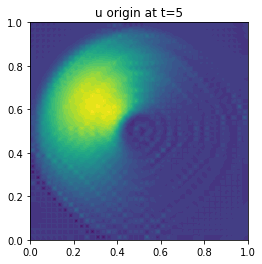

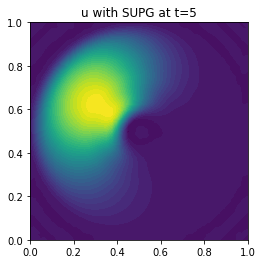

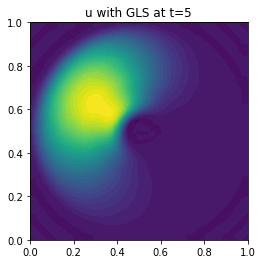

In [0]:
from dolfin import *
import os
import matplotlib.pyplot as plt


# get file name
fileName = "con_dif_rec_stab"

parameters['form_compiler']['cpp_optimize'] = True
parameters['form_compiler']['optimize'] = True


# Parameters
Pe = Constant(1e10)
nu = 1.0/Pe



# Time-stepping
t = 0.0
t_end = 10 
dt = 0.1



# Create mesh
p1 = Point(0.0, 0.0)
p2 = Point(1.0, 1.0)
mesh = RectangleMesh(p1, p2, 40, 40, diagonal='crossed')



# Define function spaces
V = FunctionSpace(mesh, "CG", 1)


# initial condition
x0 = 0.3; y0 = 0.3; r0 = 0.2
ic = Expression("((pow(x[0]-x0, 2) + pow(x[1]-y0, 2)) < r0*r0) ? (1.0) : (0.0)", x0=x0, y0=y0, r0=r0, degree = 2)



# vector field
a = Expression(("-(x[1]-0.5)","(x[0]-0.5)"), domain=mesh, degree=2)


# boundary condition
bc = DirichletBC(V, Constant(0.0), DomainBoundary())
	

# define function and test function(s)
du = TrialFunction(V); 
tu = TestFunction(V); 
u = Function(V)


# create initial function
u0 = Function(V)
u0 = interpolate(ic, V)


# source 
s = Constant(0.0)


# define stabilization term
h = mesh.hmin()
n = FacetNormal(mesh)

norm_a = sqrt(inner(a,a))



# stabilization parameter: Second order
tau = h*pow(4.0/(Pe*h) + 2.0*norm_a, -1.0)


# first alternative: replace the test function
#tu = tu + inner(a, grad(tu))*tau



# second alternative: add stabilieation term into the weak residual
def R(u, u0): 
	return (u-u0)/dt + inner(a, grad(u)) - nu*div(grad(u)) - s

def L(u, u0):
	return inner(a, grad(u)) - nu*div(grad(u))

def r(u, u0): 
	return (u-u0)/dt*tu*dx + nu*inner(grad(u), grad(tu))*dx + inner(a, grad(u))*tu*dx - s*tu*dx


# define SUPG, GLS stabilization terms
def stb_supg(u, u0): 
	return inner(a, grad(tu))*tau*R(u, u0)*dx

def stb_gls(u, u0): 
	return L(tu, u0)*tau*(L(u, u0)-s)*dx





# define linear solver
def linear_solver(dF, u):
	ffc_options = {"optimize": True, "quadrature_degree": 8}
	problem = LinearVariationalProblem(lhs(dF), rhs(dF), u, [bc], form_compiler_parameters=ffc_options)
	solver = LinearVariationalSolver(problem)
	return solver



# create vtk files
#vtk_origin = File("{}/Origin/u.pvd".format(fileName))
#vtk_supg = File("{}/SUPG/u.pvd".format(fileName))
#vtk_gls = File("{}/GLS/u.pvd".format(fileName))



def time_loop(F, u, sol_type):
	u.assign(u0)
	#save initial condition
	#vtk << u	
	t = 0.0 + dt
	u5 = interpolate( Constant(0.0), V)
	while t < t_end:
		#print("t =", t, "t_end=", t_end)

		if sol_type == 0: # linear solver
			linear_solver(F, u).solve()
		elif sol_type == 1: # non-linear solver
			solve(F==0, u, bc)
		#vtk << u
		if 5.0-1E-8<=t and t<=5.0+1E-8: 
				print(t); u5 = interpolate(u, V)
      
		# Move to next time step
		u0.assign(u)
		t += dt

	return u5
	


# define F forms (weak residual) and solve
dF = r(du, u0)
u.rename("u origin", "u origin")
u5_ori = time_loop(dF, u, 0)

u0 = interpolate(ic, V)
dF_supg = r(du, u0) + stb_supg(du, u0)
u.rename("u supg", "u supg")
u5_supg = time_loop(dF_supg, u, 0)


u0 = interpolate(ic, V)
u.rename("u gls", "u gls")
dF_gls = r(du, u0) + stb_gls(du, u0)
u5_gls = time_loop(dF_gls, u, 0)


plt.figure()
plot(u5_ori)
plt.title('u origin at t=5')


plt.figure()
plot(u5_supg)
plt.title('u with SUPG at t=5')


plt.figure()
plot(u5_gls)
plt.title('u with GLS at t=5')


plt.show()
